In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

file_names = {
    "primary_cohort": "data/s41598-020-73558-3_sepsis_survival_primary_cohort.csv",
    "study_cohort": "data/s41598-020-73558-3_sepsis_survival_study_cohort.csv",
    "validation_cohort": "data/s41598-020-73558-3_sepsis_survival_validation_cohort.csv",
}

dict_df = dict()
for key, file in file_names.items():
    dict_df[key] = pd.read_csv(file)

In [70]:
dict_df["primary_cohort"].head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,0
1,20,1,1,0
2,21,1,1,0
3,77,0,1,0
4,72,0,1,0


### **Dataset information**

#### **What do the instances in this dataset represent?**

For the primary cohort, they represent records of patients affected by sepsis potential preconditions (ante Sepsis-3 definition); for the study cohort, they represent only the patients’ admissions defined by the novel Sepsis-3 definition.

#### **Are there recommended data splits?**

No recommendation, standard train-test split could be used. Can use three-way holdout split (i.e., training, validation/development, testing) when doing model selection.

#### **Does the dataset contain data that might be considered sensitive in any way?**

Yes. It contains information about the gender and age of the patient.

#### **Was there any data preprocessing performed?**

All the categorical variables have been encoded (so no preprocessing is necessary).

#### **Additional Information**

Primary cohort from Norway:
- 4 features for 110,204 patient admissions
- file: 's41598-020-73558-3_sepsis_survival_primary_cohort.csv'

Study cohort (a subset of the primary cohort) from Norway:
- 4 features for 19,051 patient admissions
- file: 's41598-020-73558-3_sepsis_survival_study_cohort.csv'

Validation cohort from South Korea:
- 4 features for 137 patients
- file: 's41598-020-73558-3_sepsis_survival_validation_cohort.csv'

The validation cohort from South Korea was used by Chicco and Jurman (2020) as an external validation cohort to confirm the generalizability of their proposed approach. 

#### **Has Missing Values?**

No

# I. Description des datasets
### I. 1) Nombre d'échantillons et de personnes décédées (target)

In [2]:
cohorts = ["primary_cohort", "study_cohort", "validation_cohort"]
sizes = [len(dict_df[cohort]) for cohort in cohorts]

fig = make_subplots(rows=2, cols=1, subplot_titles=[
    "Nombre d'échantillons", "Pourcentage de morts"
])

fig.add_trace(
    go.Bar(x=cohorts, y=sizes, text=sizes, textposition="auto", name="Taille"),
    row=1, col=1
)

prop_deads = [
    100 * (len(dict_df[cohort]) - dict_df[cohort].hospital_outcome_1alive_0dead.sum()) / len(dict_df[cohort])
    for cohort in cohorts
]

fig.add_trace(
    go.Bar(x=cohorts, y=prop_deads, text=[f"{v:.1f}%" for v in prop_deads],
           textposition="auto", name="% morts"),
    row=2, col=1
)

fig.update_layout(
    title="Nombre de patients et de morts",
    height=700,
    showlegend=False
)

fig.show()

On remarque bien que le dataset `study_cohort` est une sous partie de `primary_cohort`, représentant environ un cinquième des observations. \
D'ailleurs, dans ce dataset, le nombre de morts est bien plus important que dans `primary_cohort`. \
Le dataset de validation `validation_cohort`(provenant de données en Corée du Sud), est de taille biens moindre mais présente une proportion de patients n'ayant pas survécus similaires au dataset d'étude `study_cohort`.


### I. 2) Répartition des ages

In [3]:
fig = make_subplots(rows=1, cols=3, subplot_titles=cohorts)

for i, cohort in enumerate(cohorts):
    fig.add_trace(
        go.Histogram(x=dict_df[cohort].age_years, name=cohort, opacity=0.6),
        row=1, col=i+1
    )


fig.update_layout(
    title="Etude des âges",
    showlegend=False,
    height=400,
    width=900
)

fig.show()

fig = go.Figure()
for cohort in cohorts:
    fig.add_trace(
        go.Box(x=dict_df[cohort].age_years, name=cohort, opacity=0.6),

    )


fig.update_layout(barmode='group')  
fig.show()

`study_cohort` compte bien moins de patients jeunes (age < 40 ans) que les deux autres datasets. Cela a pour effet de décaler les moyenne et médianes d'age de `study_cohort` vers la droite.\
Mis à part cela, les répartitions d'age sont similaires, avec une mode aux alentours de 82 ans pour les deux populations. \
Cependant, le dataset de validation provenant des données coréennes ne contient que très peu d'ages aussi élevés. On note le 3e quantile à 72 ans. 
Ces nuances entre dataset d'entraînement et de test pourra poser problème à l'établissement du modèle final. 


### I. 3) Répartition des sexes

In [4]:
fig = make_subplots(rows=1, cols=len(cohorts), subplot_titles=cohorts)

for i, cohort in enumerate(cohorts):
    fig.add_trace(
        go.Histogram(x=dict_df[cohort].sex_0male_1female, name=cohort, xbins=dict(start=-0.5, end=1.5, size=1), opacity=0.6),
        row=1, col=i+1
    )


fig.update_layout(
    title="Nombre d'hommes (0) vs nombre de femmes (1)",
    showlegend=False,
    height=400,
    width=900,
    bargap=0.3
)

fig.show()

On remarque plus d'hommes que de femmes dans chaque population étudiée \
Cependant, pour les données coréennes il y a seulement 47 pour 90 hommes : elles ne représentent qu'un tiers des patients étudiés ici. \
Pour le groupe primaire il y a 47% de femmes et pour le groupe d'étude il y en a 45%, c'est similaire. 




### I. 4) Répartition des nombre d'épisode de la maladie 

In [5]:
fig = make_subplots(rows=1, cols=len(cohorts), subplot_titles=cohorts)

for i, cohort in enumerate(cohorts):
    fig.add_trace(
        go.Histogram(x=dict_df[cohort].episode_number, name=cohort, opacity=0.6),
        row=1, col=i+1
    )


fig.update_layout(
    title="Répartition des nombre d'épisode de la maladie",
    showlegend=False,
    height=400,
    width=900,
    bargap=0.3
)

fig.show()

Sans surprise, on remarque des répartitions similaires concernant les nombres d'épisode de la maladie pour les deux datasets issus des données norvégiennes. \
Les données coréennes ne comportent pas de patients ayant eu plus de 2 fois cette maladie.

## II. Lien entre les différentes features
### II. 1) Lien entre l'âge et le sexe des différents groupes

In [6]:
fig = make_subplots(
    rows=1,
    cols=len(cohorts),
    subplot_titles=cohorts)

colors = {0:'blue', 1:'pink'}  

for i, cohort in enumerate(cohorts):
    fig.add_trace(
        go.Histogram(
            x=dict_df[cohort].loc[dict_df[cohort].sex_0male_1female == 0, 'age_years'],
            name='Homme',
            opacity=0.6,
            marker_color=colors[0],
            nbinsx=20
        ),
        row=1, col=i+1
    )

    fig.add_trace(
        go.Histogram(
            x=dict_df[cohort].loc[dict_df[cohort].sex_0male_1female == 1, 'age_years'],
            name='Femme',
            opacity=0.6,
            marker_color=colors[1],
            nbinsx=20
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title="Répartition des âges par sexe selon la cohorte",
    xaxis_title="Âge",
    yaxis_title="Nombre de patients",
    barmode='overlay',   
    height=500,
    width=1200,
    showlegend=False
)

fig.show()


Comme montré précédemment il y a moins de jeunes dans `primary_cohort` que dans `study_cohort`. \ 
Ces deux populations comportent légèrement plus d'hommes entre 50 et 90 ans et légèrement plus de femmes agées de plus de 90 ans. \
Pour la population validation d'origine coréenne, on remarque beaucoup plus d'hommes en général.

### II. 2) Effets généraux de l'age et du sexe sur le % de morts

In [7]:
fig = make_subplots(
    rows=1,
    cols=len(cohorts),
    subplot_titles=list(cohorts),
    shared_yaxes=True  
)

for i, cohort in enumerate(cohorts, start=1):
    
    prob = dict_df[cohort].copy()
    prob["age_bin"] = pd.cut(prob.age_years, bins=range(0, 101, 10), right=False)

    prob = (
        prob
        .groupby(['age_bin', 'sex_0male_1female'])
        .hospital_outcome_1alive_0dead
        .mean()
        .reset_index()
    )
    prob['death_prob'] = 1 - prob.hospital_outcome_1alive_0dead 

    for sex in [0, 1]:
        subset = prob[prob['sex_0male_1female'] == sex]
        fig.add_trace(
            go.Scatter(
                x=subset['age_bin'].astype(str),
                y=subset['death_prob'],
                mode='lines+markers',
                name=f"{'Homme' if sex==0 else 'Femme'} ({cohort})",
                line=dict(color=colors[sex]),
                showlegend=(i == 1) 
            ),
            row=1, col=i
        )


fig.update_layout(
    title="Visualisation des effets de l'âge et du sexe sur le % de mort",
    height=500,
    width=1200,
    xaxis_title="Tranches d'âge (ans)",
    yaxis_title="% de mort",
    yaxis=dict(range=[0, 1]), 
    legend_title="Sexe",
    template="plotly_white",
    font=dict(size=13)
)

fig.show()




C:\Users\pupin\AppData\Local\Temp\ipykernel_22436\1305488874.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pupin\AppData\Local\Temp\ipykernel_22436\1305488874.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pupin\AppData\Local\Temp\ipykernel_22436\1305488874.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Il ne sert à rien d'observer `validation_cohort` car pour de nombreuses tranches d'age il n'y a que très peu de données de patient. Ainsi moyenner pour ces tranches d'âge ne donne pas une valeur consistante de pourcentage de morts. \
Les deux datasets issus des données norvégiennes ont une allure similaire mais pas tout à fait les mêmes valeurs

In [8]:
fig = go.Figure()

for i, cohort in enumerate(cohorts[:2], start=1):
    prob = dict_df[cohort].copy()
    prob["age_bin"] = pd.cut(prob.age_years, bins=range(0, 101, 10), right=False)

    prob = (
        prob
        .groupby(['age_bin', 'sex_0male_1female'])
        .hospital_outcome_1alive_0dead
        .mean()
        .reset_index()
    )
    prob['death_prob'] = 1 - prob.hospital_outcome_1alive_0dead 
    for sex in [0, 1]:
        subset = prob[prob['sex_0male_1female'] == sex]
        fig.add_trace(
            go.Scatter(
                x=subset['age_bin'].astype(str),
                y=subset['death_prob'],
                mode='lines+markers',
                name=f"{'Homme' if sex==0 else 'Femme'} ({cohort})",
                line=dict(color=colors[sex], dash='solid' if i == 1 else 'dash')  # 🔹 dash différent pour différencier cohortes
            )
        )

fig.update_layout(
    title="Comparaison des deux premières cohortes – Effet de l'âge et du sexe sur la proportion de morts",
    height=500,
    width=900,
    xaxis_title="Tranches d'âge (ans)",
    yaxis_title="Probabilité de mort",
    yaxis=dict(range=[0, 1]),
    legend_title="Sexe et cohorte",
    template="plotly_white",
    font=dict(size=13)
)



fig.show()


C:\Users\pupin\AppData\Local\Temp\ipykernel_22436\3446930734.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pupin\AppData\Local\Temp\ipykernel_22436\3446930734.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



On remarque bien qu'il y a davantage de morts dans le datasets d'études que dans le dataset d'origine, er ceci pour chaque âge. \
On ne sait pas précisément comment les données ont été sélectionnées pour créer le dataset d'étude mais il semble que les patients les plus vulnérables ait été choisis.

### II. 3) Effets du nombre d'épisodes de sepsis sur la mortalité

In [9]:
all_episodes = sorted(set().union(*[dict_df[c]['episode_number'].unique() for c in cohorts]))
color_map = {ep: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] 
             for i, ep in enumerate(all_episodes)}

fig = go.Figure()

for cohort in cohorts:
    deaths = (
        dict_df[cohort]
        .query("hospital_outcome_1alive_0dead == 0")  # 0 = mort
        .groupby('episode_number')
        .size()
        .reset_index(name='death_count')
    )
    deaths['cohort'] = cohort  # pour garder l’info de cohorte

    for episode in sorted(deaths['episode_number'].unique()):
        subset = deaths[deaths['episode_number'] == episode]
        fig.add_trace(
            go.Bar(
                x=subset['cohort'],
                y=subset['death_count'],
                name=f"Épisode {episode}",
                marker_color=color_map[episode],  
                opacity=0.9
            )
        )

fig.update_layout(
    title="Répartition (%) des morts par cohorte et par épisode",
    barmode='relative',   
    barnorm='percent',   
    height=500,
    width=900,
    xaxis_title="Cohorte",
    yaxis_title="Pourcentage de morts (%)",
    showlegend=False,
    template="plotly_white",
    font=dict(size=13)
)

fig.show()


Les données de `primary_cohort` et de `study_cohort` contiennent des morts pour les mêmes nombre d'épisodes de la maladie.
Cependant, `validation_cohort` ne comprenant que des malades étant à leur premier ou second épisode de la maladie, on ne retrouve pas la même distribution. 

# III. Création d'un modèle de classification

### III. 1) Choix du modèle à entraîner
Pour ce type de dataset patient, XGBoost peut sembler pertinent :
- Gère bien les datasets avec features mixtes (numériques, catégoriques après encodage).
- Permet de contrôler le nombre de faux positifs / négatifs via les hyperparamètres
- Fournit des importances de variables, utile pour interprétation médicale.

**Remarque :** 
- Pas de feature engineering à faire ou presque
- On ne va pas utiliser `train_test_split` car les datasets d'entraînement et de validation ont déjà été récupérés : ce sont `study_cohort` et `validation_cohort`
- Ici, on préfère déceler des faux positifs car il s'agit d'une première méthode statistique, qui doit ensuite mener à des tests cliniques afin de voir si le patient risque réellement de mourir. On évite particulièrement les faux négatifs.
####

### III. 2) Entraînement d'un modèle XGBoost

La fonction `XGBClassifier` permet de traîter ce genre de problèmes avec `scale_pos_weight` afin de mettre plus de poids sur les personnes malades, dans le but de pondérer le mieux le modèle et de ne pas diagnostiquer tout le monde comme faux négatif.  
On avait remarqué pourcentage de patients décédés dans `study_test` de moins de 20%, ce qui est assez minoritaire donc on va donner plus d'importance aux patients décédés.  


Comme nous sommes principalement intéressés par la prédiction de la mort des patients nous allons changer les valeurs de la colonne 'hospital_outcome_1alive_0dead' afin que les 0 deviennent des 1 et inversement. Ceci rendra l'interprétation des modèles plus facile. Ce sera notre seule étape de feature engineering.

In [10]:
#Inversion des valeurs dans la colonne 0dead_1alive
for cohort in cohorts:
    dict_df[cohort]['hospital_outcome_1alive_0dead'] = 1 - dict_df[cohort]['hospital_outcome_1alive_0dead']


Nous allons entraîner un premier modèle XGBoost avec des paramètres basiques pour voir le comportement global du modèle avec notre problème.

In [17]:
from xgboost import XGBClassifier

X = dict_df["study_cohort"].drop("hospital_outcome_1alive_0dead", axis=1)
y = dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]

ratio_neg_pos = (dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]==0).sum() / (dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]==1).sum()  #donner plus de poids à la classe des morts (1) car moins représentée

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio_neg_pos,
    use_label_encoder=False
)

model.fit(X, y)



c:\Users\pupin\miniconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning:

[18:06:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


Analysons maintenant la performance du modèle à l'aide de la matrice de confusion et des fonctions précision, recall et score f1.

Matrice de confusion :
[[75 38]
 [17  7]]


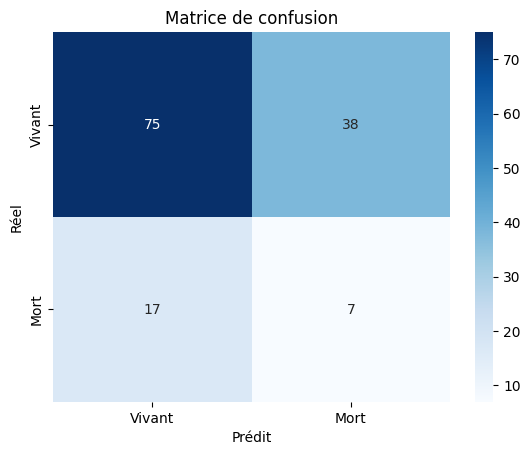

Recall (Sensibilité) : 0.292  # part de positifs détectés sur l'ensemble du dataset
Precision : 0.156  # proportion de vrais positifs parmi les prédits positifs
F1-score : 0.203  # compromis Precision/Recall


In [18]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Features et target de la cohorte de validation
X_val = dict_df["validation_cohort"].drop("hospital_outcome_1alive_0dead", axis=1)
y_val = dict_df["validation_cohort"]["hospital_outcome_1alive_0dead"]

# Prédictions
y_pred = model.predict(X_val)

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
print("Matrice de confusion :")
print(cm)

# Affichage graphique
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Vivant', 'Mort'], yticklabels=['Vivant', 'Mort'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

# Calcul des métriques de performance
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Recall (Sensibilité) : {recall:.3f}  # part de positifs détectés sur l'ensemble du dataset")
print(f"Precision : {precision:.3f}  # proportion de vrais positifs parmi les prédits positifs")
print(f"F1-score : {f1:.3f}  # compromis Precision/Recall")

On remarque alors que le modèle n'est pas bon : on ne prédit correctement que 7 morts sur 24 et on prédit 38 patients vivants comme morts, les métriques d'évaluation de la performance sont faibles (valeurs proches de 0 et éloignées de 1).  
On va absolument chercher à détecter tous les patients morts, si un patient vivant est détecté comme mort, cela n'est pas un très gros problème car cette personne là pourra faire des examens supplémentaires afin de pouvoir vérifier si son pronostic vital est en jeu.

On va donc chercher de meilleurs hyperparamètres pour notre modèle XGBoost.

### III. 3) Dimensionnement des hyperparamètres

In [48]:
X_train = dict_df["study_cohort"].drop("hospital_outcome_1alive_0dead", axis=1)
y_train = dict_df["study_cohort"]["hospital_outcome_1alive_0dead"]

X_val = dict_df["validation_cohort"].drop("hospital_outcome_1alive_0dead", axis=1)
y_val = dict_df["validation_cohort"]["hospital_outcome_1alive_0dead"]

# Liste des hyperparamètres à tester
max_depth_list = [3, 5, 7]
learning_rate_list = [0.01, 0.1, 0.2, 0.5]
n_estimators_list = [100, 500, 1000]
scale_pos_weight_list = [4, 6, 8, 10]  # exemple de ratios neg/pos

results = []

for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for n_estimators in n_estimators_list:
            for scale_pos_weight in scale_pos_weight_list:
                
                model = XGBClassifier(
                    objective='binary:logistic',
                    eval_metric='logloss',
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    n_estimators=n_estimators,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    scale_pos_weight=scale_pos_weight,
                )
                
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
                
                recall = recall_score(y_val, y_pred)
                precision = precision_score(y_val, y_pred)
                f1 = f1_score(y_val, y_pred)
                
                results.append({
                    'max_depth': max_depth,
                    'learning_rate': learning_rate,
                    'n_estimators': n_estimators,
                    'scale_pos_weight': scale_pos_weight,
                    'recall': recall,
                    'precision': precision,
                    'f1': f1
                })

# Convertir en DataFrame pour analyse
results_df = pd.DataFrame(results)

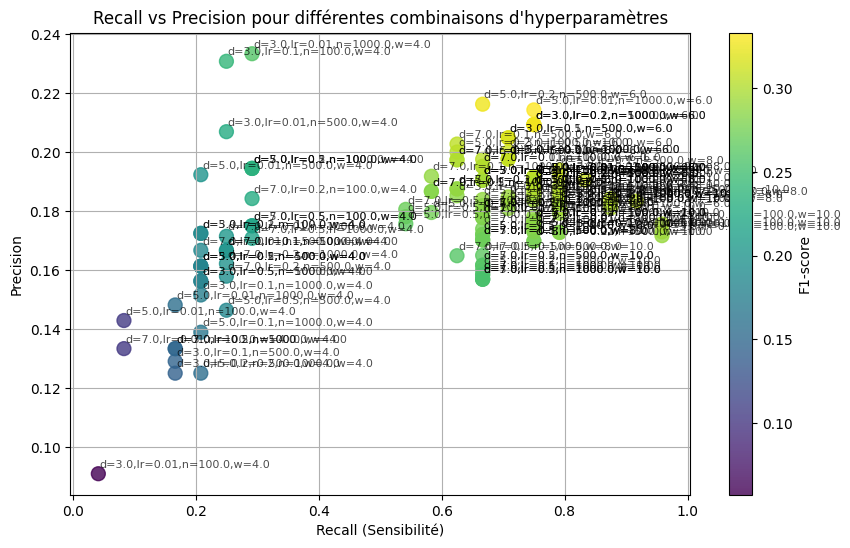

In [49]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df['recall'], 
    results_df['precision'], 
    c=results_df['f1'],  # couleur selon le F1-score
    s=100,               # taille des points
    cmap='viridis',
    alpha=0.8
)

plt.colorbar(scatter, label='F1-score')
plt.xlabel('Recall (Sensibilité)')
plt.ylabel('Precision')
plt.title('Recall vs Precision pour différentes combinaisons d\'hyperparamètres')
plt.grid(True)

# Ajouter labels pour les points (optionnel, si pas trop de combinaisons)
for i, row in results_df.iterrows():
    plt.text(row['recall']+0.002, row['precision']+0.002,
             f"d={row['max_depth']},lr={row['learning_rate']},n={row['n_estimators']},w={row['scale_pos_weight']}",
             fontsize=8, alpha=0.7)

plt.show()

On va d'abord chercher les hyperparamètres pour lesquels le recall est le meilleur car selon le tracé ci dessus, la précision n'est jamais excellente et avoir un bon recall est le plus important.  
On va aussi chercher les hyperparamètres pour lesquels le score f1 est le meilleur car il est un compromis entre recall et précision. On comparera ensuite les deux modèles obtenus avec ces paramètres.

In [50]:

# Trouver celui avec le recall le plus élevé
best_result_recall = max(results, key=lambda r: r['recall'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du recall) :")
print(best_result_recall)

# Trouver celui avec le F1 le plus élevé
best_result_f1 = max(results, key=lambda r: r['f1'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du F1) :")
print(best_result_f1)


Meilleur résultat (au sens du recall) :
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'scale_pos_weight': 10, 'recall': 0.9583333333333334, 'precision': 0.17164179104477612, 'f1': 0.2911392405063291}
Meilleur résultat (au sens du F1) :
{'max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 1000, 'scale_pos_weight': 6, 'recall': 0.75, 'precision': 0.21428571428571427, 'f1': 0.3333333333333333}


Pour les hyperparamètres du meilleur recall, on à un recall de 0.96, ce qui signifie que l'on prédit correctement 96% des patiens décédés ce qui est très intéressant : cela est surement dû au fait que l'on a mis beaucoup de poids sur les morts dans la colonne ('scale_pos_weight': 10).  
En revanche la précision est seulement de 0.17, ce qui signifie que seulement 17% des patients prédits morts le sont réellement : en fait cela correspond presque à la proportions de patients décédés dans notre dataset, on prédit tous les patient comme décédés.

Pour les hyperparamètres du meilleur f1, on à un recall de 0.75, ce qui signifie que l'on prédit correctement 75% des patiens décédés.  
La précision est de 0.21, ce qui signifie que 21% des patients prédits morts le sont réellement, cela fait toujours beaucoup d'erreurs.


Essayons de faire une recherche d'hyperparamètres plus poussés à partir des meilleurs paramètres obtenus avec la recherche précedente.

In [51]:
# Entraîner les 2 modèles finaux avec les meilleurs hyperparamètres
model_recall = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=best_result_recall['max_depth'],
    learning_rate=best_result_recall['learning_rate'],
    n_estimators=best_result_recall['n_estimators'],
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=best_result_recall['scale_pos_weight'],
)

model_recall.fit(X_train, y_train)

model_f1 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=best_result_f1['max_depth'],
    learning_rate=best_result_f1['learning_rate'],
    n_estimators=best_result_f1['n_estimators'],
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=best_result_f1['scale_pos_weight'],
)

model_f1.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


Matrice de confusion (Recall) :
[[  2 111]
 [  1  23]]


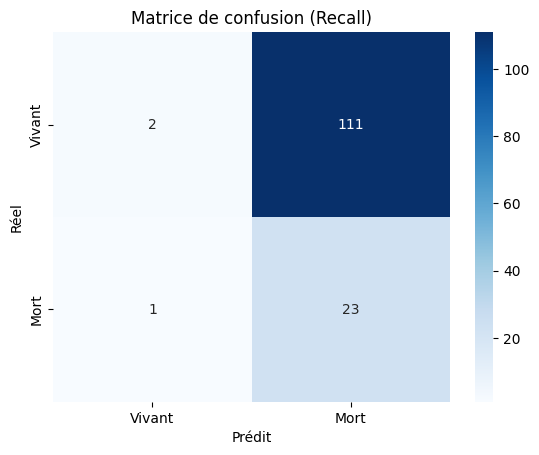

Matrice de confusion (F1) :
[[47 66]
 [ 6 18]]


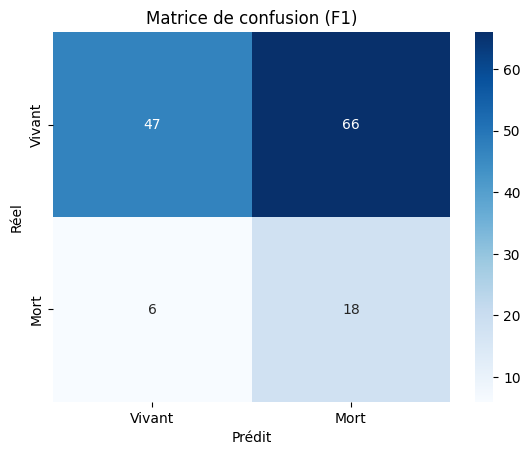

In [53]:
# Prédictions
y_pred_recall = model_recall.predict(X_val)
y_pred_f1 = model_f1.predict(X_val)

# Matrice de confusion
cm_recall = confusion_matrix(y_val, y_pred_recall)
cm_f1 = confusion_matrix(y_val, y_pred_f1)



# Affichage graphique recall
print("Matrice de confusion (Recall) :")
print(cm_recall)
sns.heatmap(cm_recall, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Vivant', 'Mort'], yticklabels=['Vivant', 'Mort'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (Recall)")
plt.show()

# Affichage graphique F1
print("Matrice de confusion (F1) :")
print(cm_f1)
sns.heatmap(cm_f1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Vivant', 'Mort'], yticklabels=['Vivant', 'Mort'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (F1)")
plt.show()


Comme attendu, on voit sur la matrice de confusion du recall que presque tous les patients sont prédits comme morts : ce modèle est inutilisable, il reviendrait a dire que tous le patients entrant dans l'hopital pour un choc septique sont en danger de mort.  
Le modèle présentant le meilleur score f1 ne prédit pas tous les patients comme morts, mais c'est quand même la majorité qui est prédite décédée. Même si on prédit correctement 75% des patients réellement morts, ce modèle n'est pas très bon et un diagnostique médical basé sur lui est trop aléatoire.  
Nous allons donc essayer de trouver un meilleur classifieur.

### III. 4) Entraînement d'un modèle SVM

Puisque XGBoost n'était pas satisfaisant, essayons d'entrainer un SVM pour voir si les résultats sont différents.  
Comme on suppose qu'on ne peut pas séparer linéairement les patients, on va utiliser un noyau rbf.

In [60]:
from sklearn import svm
 
C = [0.01, 0.1, 1, 10]
y_list = []
results_svm = []
for k in range(len(C)):
    svm_model = svm.SVC(kernel='rbf', C=C[k], gamma='scale', class_weight='balanced')
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_val)
    y_list.append(y_pred_svm)

    recall = recall_score(y_val, y_pred_svm)
    precision = precision_score(y_val, y_pred_svm)
    f1 = f1_score(y_val, y_pred_svm)
    
    results_svm.append({
                    'C': C[k],
                    'recall': recall,
                    'precision': precision,
                    'f1': f1
                })
    print(results_svm[k])

{'C': 0.01, 'recall': 0.4583333333333333, 'precision': 0.22448979591836735, 'f1': 0.3013698630136986}
{'C': 0.1, 'recall': 0.4583333333333333, 'precision': 0.22448979591836735, 'f1': 0.3013698630136986}
{'C': 1, 'recall': 0.4583333333333333, 'precision': 0.2558139534883721, 'f1': 0.3283582089552239}
{'C': 10, 'recall': 0.375, 'precision': 0.23684210526315788, 'f1': 0.2903225806451613}


On va récupérer le meilleur C pour le recall et le score f1 puis affiner la recherche à partir de là.

In [61]:
# Trouver celui avec le recall le plus élevé
best_result_recall = max(results_svm, key=lambda r: r['recall'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du recall) :")
print(best_result_recall)

# Trouver celui avec le F1 le plus élevé
best_result_f1 = max(results_svm, key=lambda r: r['f1'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du F1) :")
print(best_result_f1)

Meilleur résultat (au sens du recall) :
{'C': 0.01, 'recall': 0.4583333333333333, 'precision': 0.22448979591836735, 'f1': 0.3013698630136986}
Meilleur résultat (au sens du F1) :
{'C': 1, 'recall': 0.4583333333333333, 'precision': 0.2558139534883721, 'f1': 0.3283582089552239}


On voit que le recall est le même pour les deux valeurs de C sélectionnées mais pour C = 1, on a une meilleure précision (bien qu'elle ne soit que de 0.26).  
Le recall est seulement de 0.46 ce qui n'est pas satisfaisant.  
Par ailleurs, pour les différentes valeurs de C, on ne remarque pas de très grosses différences sur nos métriques de performance donc il est inutile d'affiner la recherche de ce côté là, on n'aura pas de meilleur résultat.

In [62]:
svm_model = svm.SVC(kernel='rbf', C=best_result_recall['C'], gamma='scale', class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)


Matrice de confusion :
[[75 38]
 [13 11]]
Pour C = 0.01 :


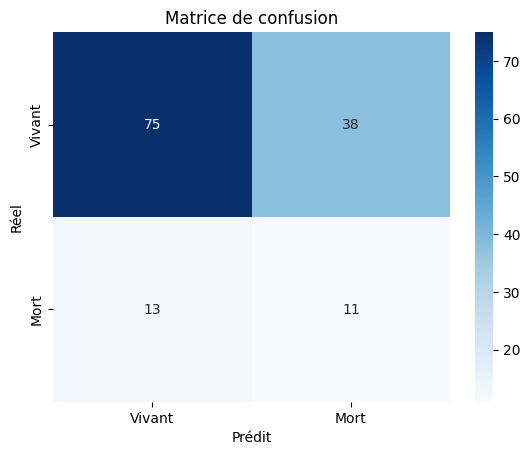

Recall (Sensibilité) : 0.458  # part de positifs détectés sur l'ensemble du dataset
Precision : 0.224  # proportion de vrais positifs parmi les prédits positifs
F1-score : 0.301  # compromis Precision/Recall


In [63]:
# Matrice de confusion
cm = confusion_matrix(y_val, y_pred_svm)
print("Matrice de confusion :")
print(cm)
print(f"Pour C = {best_result_recall['C']} :")

# Affichage graphique
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Vivant', 'Mort'], yticklabels=['Vivant', 'Mort'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

# Calcul des métriques
recall = recall_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm)
f1 = f1_score(y_val, y_pred_svm)

print(f"Recall (Sensibilité) : {recall:.3f}  # part de positifs détectés sur l'ensemble du dataset")
print(f"Precision : {precision:.3f}  # proportion de vrais positifs parmi les prédits positifs")
print(f"F1-score : {f1:.3f}  # compromis Precision/Recall")

Les résultats avec SVM ne sont pas satisfaisants, la prédiction est aléatoire. On n'a pas beaucoup d'hyperparamètres à explorer donc nous allons conclure notrre étude de SVM ici car il est peu probable que l'on arrive à un résultat concluant.

### III. 5) Entraînement d'un modèle RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
n_estimators = [50, 100, 1000]
max_depth = [3, 5, 7, 10]
max_features = ['sqrt', 'log2', 0.3, 0.5, 0.7]
min_samples_split = [2, 5, 10]
results_rf = []
for n in n_estimators:
    for depth in max_depth:
        for max_feat in max_features:
            for min_split in min_samples_split:
                rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, max_features=max_feat, min_samples_split=min_split, class_weight='balanced', random_state=42)
                rf_model.fit(X_train, y_train)

                y_pred_rf = rf_model.predict(X_val)

                recall = recall_score(y_val, y_pred_rf)
                precision = precision_score(y_val, y_pred_rf)
                f1 = f1_score(y_val, y_pred_rf)

                results_rf.append({
                    'max_depth': depth,
                    'max_features': max_feat,
                    'n_estimators': n,
                    'min_samples_split': min_split,
                    'recall': recall,
                    'precision': precision,
                    'f1': f1
                })
                


In [65]:
# Trouver celui avec le recall le plus élevé
best_result_recall = max(results_rf, key=lambda r: r['recall'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du recall) :")
print(best_result_recall)

# Trouver celui avec le F1 le plus élevé
best_result_f1 = max(results_rf, key=lambda r: r['f1'])

# Afficher le résultat optimal
print("Meilleur résultat (au sens du F1) :")
print(best_result_f1)

Meilleur résultat (au sens du recall) :
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'min_samples_split': 2, 'recall': 0.4583333333333333, 'precision': 0.171875, 'f1': 0.25}
Meilleur résultat (au sens du F1) :
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50, 'min_samples_split': 2, 'recall': 0.4166666666666667, 'precision': 0.2702702702702703, 'f1': 0.32786885245901637}


Là encore les résultats sont peu probants : on retrouve plus ou moins les mêmes valeurs qu'avec le SVM. Avec un recall de 0.42 et une précsion de 0.27, on peut considérer que le meilleur résultat est le jeu de paramètre donnant le meilleur score f1, observons alors la matrice de confusion des résultats de ce modèle.

In [67]:
rf_model = RandomForestClassifier(n_estimators=best_result_f1['n_estimators'], max_depth=best_result_f1['max_depth'], max_features=best_result_f1['max_features'], min_samples_split=best_result_f1['min_samples_split'], class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

Matrice de confusion :
[[86 27]
 [14 10]]


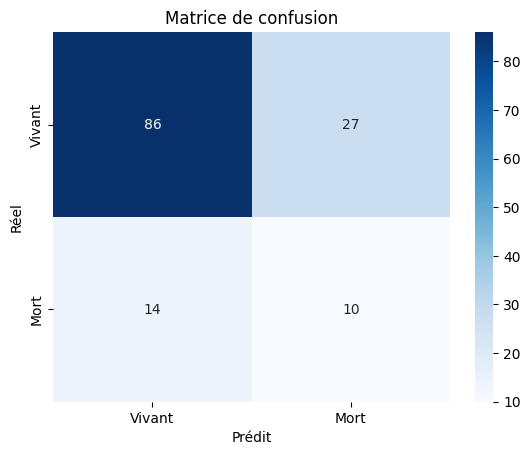

Recall (Sensibilité) : 0.458  # part de positifs détectés sur l'ensemble du dataset
Precision : 0.224  # proportion de vrais positifs parmi les prédits positifs
F1-score : 0.301  # compromis Precision/Recall


In [68]:
# Matrice de confusion
cm = confusion_matrix(y_val, y_pred_rf)
print("Matrice de confusion :")
print(cm)
# Affichage graphique
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Vivant', 'Mort'], yticklabels=['Vivant', 'Mort'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

# Calcul des métriques
recall = recall_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm)
f1 = f1_score(y_val, y_pred_svm)

print(f"Recall (Sensibilité) : {recall:.3f}  # part de positifs détectés sur l'ensemble du dataset")
print(f"Precision : {precision:.3f}  # proportion de vrais positifs parmi les prédits positifs")
print(f"F1-score : {f1:.3f}  # compromis Precision/Recall")

On voit bien que la performance du modèle laisse à désirer : on n'arrive pas a prédire correctement la moitié des patients décédés.  

Nous allons maintenant utiliser une fonctionnalité du classifieur RandomForest pour observer quelles features sont les plus importantes pour la classification.

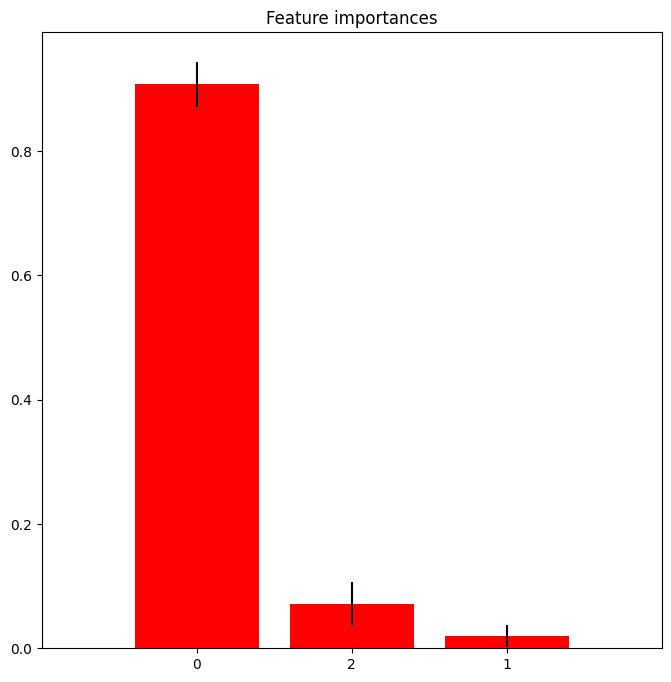

In [69]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Si l'on reprend la structure de notre dataset, on comprend que les correspondances entre features sont : 0 = Age ; 1 = Sexe ; 2 = Sepsis episode. On en conclut qu'en fait, l'âge est quasiment la seule feature prise en compte pour la classification par notre RandomForest : c'est logique, indépendemment du nombre d'épisode de sepsis ou de l'âge, la probabilité de mortalié augmente avec l'âge.

# IV. Conclusion de l'étude : performance du modèle et limites

Pour conclure, on a pu voir qu'aucun des modèles que l'on a essayé n'est exploitable en pratique pour une application médicale : ou bien on prédit que quasiment tous les patients sont en dangers de morts, ou bien on n'arrive pas à prédire correctement les patients en danger de mort en proportion suffisante.  
En réalité, cela n'est pas étonnant étant données les features dont on dispose : seulement 3 features, si peu discriminantes pour prédire si un patient est en danger de mort, il est quasiment impossible d'avoir un modèle capable de prédire correctement la target dans ce cas. Il nous faudrait éventuellement plus de données médicales sur l'état de santé du patient.  
Peut-être arriverait-on à des résultats plus exploitables si on traitait ce problème avec un réseau de neurones ?